In [2]:
# Importing useful packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Importing csv file into variable
data = pd.read_csv("ReadyDF_USE_ME", index_col=0)
data.head(2)

I1                                  I2    I3  P_IPO   P_H  P_L  P_1Day  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674   10.0   9.5  8.5   11.87   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834    8.0  10.0  8.0    7.25   

   Y1  Y2      C1    ...           C7  C3'       C5'    C6'       T3'  \
0   0   1  122.00    ...     3.716773    1  3.864345  900.0  0.908876   
1   1   0  152.75    ...     2.960063    0  4.865080    0.0  0.898724   

        T4'       T5'       S1'       S2'       S3'  
0  0.640426  0.054250  0.004875  0.009199  0.010929  
1  0.644753  0.051395  0.003258  0.011105  0.010876  

[2 rows x 22 columns]

In [3]:
print(data.corr(method="spearman"))

              I3     P_IPO       P_H       P_L    P_1Day        Y1        Y2  \
I3      1.000000  0.099088  0.004011  0.002511  0.074290 -0.097887  0.101717   
P_IPO   0.099088  1.000000  0.800209  0.802125  0.644600 -0.516461  0.009602   
P_H     0.004011  0.800209  1.000000  0.996178  0.444217 -0.078918 -0.102684   
P_L     0.002511  0.802125  0.996178  1.000000  0.447109 -0.078283 -0.104790   
P_1Day  0.074290  0.644600  0.444217  0.447109  1.000000 -0.434667  0.428875   
Y1     -0.097887 -0.516461 -0.078918 -0.078283 -0.434667  1.000000 -0.223612   
Y2      0.101717  0.009602 -0.102684 -0.104790  0.428875 -0.223612  1.000000   
C1      0.057213 -0.067441 -0.054621 -0.052524 -0.027377  0.054003 -0.010010   
C2     -0.040476  0.267550  0.280728  0.291564  0.234564 -0.064492  0.067018   
C4     -0.039232 -0.004271 -0.041148 -0.045253  0.002386 -0.069034  0.099981   
C7      0.094845  0.390872  0.480249  0.483129  0.154716 -0.040496 -0.053516   
C3'     0.108454  0.158533  0.141442  0.

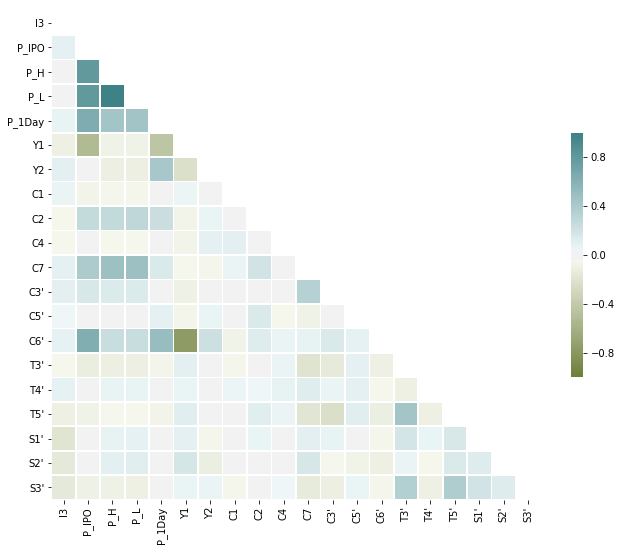

In [4]:
## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [6]:
## Now we will check to see which features are highly correlated

Y1 = data.corr()['Y1'] > 0.5
Y1_2 = data.corr()['Y1'] < -0.5

## Using the 'pipe' as the logical OR operator to give results
Y1 | Y1_2

## C6' is highly correlated

I3        False
P_IPO     False
P_H       False
P_L       False
P_1Day    False
Y1         True
Y2        False
C1        False
C2        False
C4        False
C7        False
C3'       False
C5'       False
C6'        True
T3'       False
T4'       False
T5'       False
S1'       False
S2'       False
S3'       False
Name: Y1, dtype: bool

In [8]:
## Now we will check to see which features are highly correlated

Y2 = data.corr()['Y2'] > 0.5
Y2_1 = data.corr()['Y2'] < -0.5

## Using the 'pipe' as the logical OR operator to give results
Y2 | Y2_1

## There are no features that are highly correlated with feature 'Y2'

I3        False
P_IPO     False
P_H       False
P_L       False
P_1Day    False
Y1        False
Y2         True
C1        False
C2        False
C4        False
C7        False
C3'       False
C5'       False
C6'       False
T3'       False
T4'       False
T5'       False
S1'       False
S2'       False
S3'       False
Name: Y2, dtype: bool